In [ ]:
# Load the data from the Apporto machine to the Colab environment

from google.colab import files
uploaded = files.upload()

Saving PersonalLoan.csv to PersonalLoan.csv


In [ ]:
# Pandas is the Python package for data frames

import pandas as pd

In [ ]:
# Part 1 Data Acquisition

# Read data from a CSV file into a data frame
df = pd.read_csv('PersonalLoan.csv')

# Display the first ten rows of the data frame to examine if it is an individual-level data set
print(df.head(10))

# Display the variable list
print(df.columns.values)

# Display the number of rows and the number of columns in the data set to confirm the portrait shape
# The first element of the output is the number of rows and the second is the number of columns 
print(df.shape)

   Age  Experience  Income  ZIPCode  ...  CDAccount  Online  CreditCard  PersonalLoan
0   25           1      49    91107  ...         No      No          No            No
1   45          19      34    90089  ...         No      No          No            No
2   39          15      11    94720  ...         No      No          No            No
3   35           9     100    94112  ...         No      No          No            No
4   35           8      45    91330  ...         No      No         Yes            No
5   37          13      29    92121  ...         No     Yes          No            No
6   53          27      72    91711  ...         No     Yes          No            No
7   50          24      22    93943  ...         No      No         Yes            No
8   35          10      81    90089  ...         No     Yes          No            No
9   34           9     180    93023  ...         No      No          No           Yes

[10 rows x 13 columns]
['Age' 'Experience' 'Income' '

In [ ]:
# Part 3 Missing Value Imputation

# Show the number of missing values for each variable in the data frame
df.isnull().sum()

# Drop ZIP Code for now
rvar_list =['ZIPCode']
df_sample1 = df.drop(columns=rvar_list)

# Separate all the variables into two lists for future column indexing
# One for numerical, the other for categorical 
cvar_list = ['Education', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard', 'PersonalLoan']
nvar_list = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# Check if there is any missing value left
df_sample1.isnull().sum()


Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
PersonalLoan         0
dtype: int64

In [ ]:
# Part 4 Variable Transformation

# For classificaiton tree, we skip standardizing the numerical variables 
df_sample2 = df_sample1.copy()
## df_sample2[nvar_list] = (df_sample1[nvar_list] - df_sample1[nvar_list].mean())/df_sample1[nvar_list].std()

# Set the datatype for the variables in the cvar_list to be categorical in Python
# Set the datatype for the variables in the nvar_list to be numerical in Python 
df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

# Convert the categorical variables into dummies (Step 1 of dummy coding)
# prefix_sep is the sympol used to create the dummy variable names.

df_sample4 = df_sample3.copy()
df_sample4 = pd.get_dummies(df_sample3, prefix_sep='_')

# Remove the redundant dummies (Step 2 of dummy coding)
# Placeholder variable: rdummies
rdummies = ['Education_1', 'SecuritiesAccount_Yes', 'CDAccount_Yes', 'Online_Yes', 'CreditCard_Yes', 'PersonalLoan_No']
#rdummies = ['PersonalLoan_No']
df_sample5 = df_sample4.copy()
df_sample5 = df_sample4.drop(columns=rdummies)

# Get the remaining variable list after the variable transformation
print(df_sample5.columns.values)

# Display the milestone dataframe. Compare it with the original dataframe.
print(df_sample5)
print(df)

['Age' 'Experience' 'Income' 'Family' 'CCAvg' 'Mortgage' 'Education_2'
 'Education_3' 'SecuritiesAccount_No' 'CDAccount_No' 'Online_No'
 'CreditCard_No' 'PersonalLoan_Yes']
       Age  Experience  Income  ...  Online_No  CreditCard_No  PersonalLoan_Yes
0     25.0         1.0    49.0  ...          1              1                 0
1     45.0        19.0    34.0  ...          1              1                 0
2     39.0        15.0    11.0  ...          1              1                 0
3     35.0         9.0   100.0  ...          1              1                 0
4     35.0         8.0    45.0  ...          1              0                 0
...    ...         ...     ...  ...        ...            ...               ...
4995  29.0         3.0    40.0  ...          0              1                 0
4996  30.0         4.0    15.0  ...          0              1                 0
4997  63.0        39.0    24.0  ...          1              1                 0
4998  65.0        40.0    4

In [ ]:
# Part 5 Data Partiton

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: model_selection. Required function name: train_test_split
from sklearn.model_selection import train_test_split

# Placeholder variables: df4partition, testpart_size
# test_size specifies the percentage for the test partition
df4partition = df_sample5
testpart_size = 0.2

# random_state specifies the seed for random number generator. 
# random_state = 1 unless otherwised noted
df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)

print(df_nontestData)

       Age  Experience  Income  ...  Online_No  CreditCard_No  PersonalLoan_Yes
1233  53.0        29.0    22.0  ...          0              1                 0
1056  36.0         6.0    25.0  ...          0              1                 0
1686  62.0        38.0    39.0  ...          0              1                 0
187   46.0        21.0   159.0  ...          0              1                 1
3840  56.0        31.0    35.0  ...          1              1                 0
...    ...         ...     ...  ...        ...            ...               ...
2895  60.0        36.0    39.0  ...          0              1                 0
2763  55.0        31.0    13.0  ...          0              1                 0
905   46.0        22.0    28.0  ...          0              0                 0
3980  46.0        22.0    89.0  ...          0              1                 0
235   38.0         8.0    71.0  ...          0              1                 0

[4000 rows x 13 columns]


In [ ]:
# Part 6 Classification tree 

# Required package: scikit-learn. Package name in Python: sklearn
# Required subpackage: tree 
# Required function name: DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Separate the predictor values and the DV values into X and y respectively
# Placeholder variable: DV
DV = 'PersonalLoan_Yes'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image

# A user-defined function summary_tree to display a classification tree
def summary_tree(model_object):
  dot_data = StringIO()
  export_graphviz(model_object, out_file=dot_data, filled=True,
                  rounded=True, special_characters=True, feature_names=X.columns.values,
                  class_names=['0', '1'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  output_imagefile = 'tree.png'
  graph.write_png(output_imagefile)
  return output_imagefile


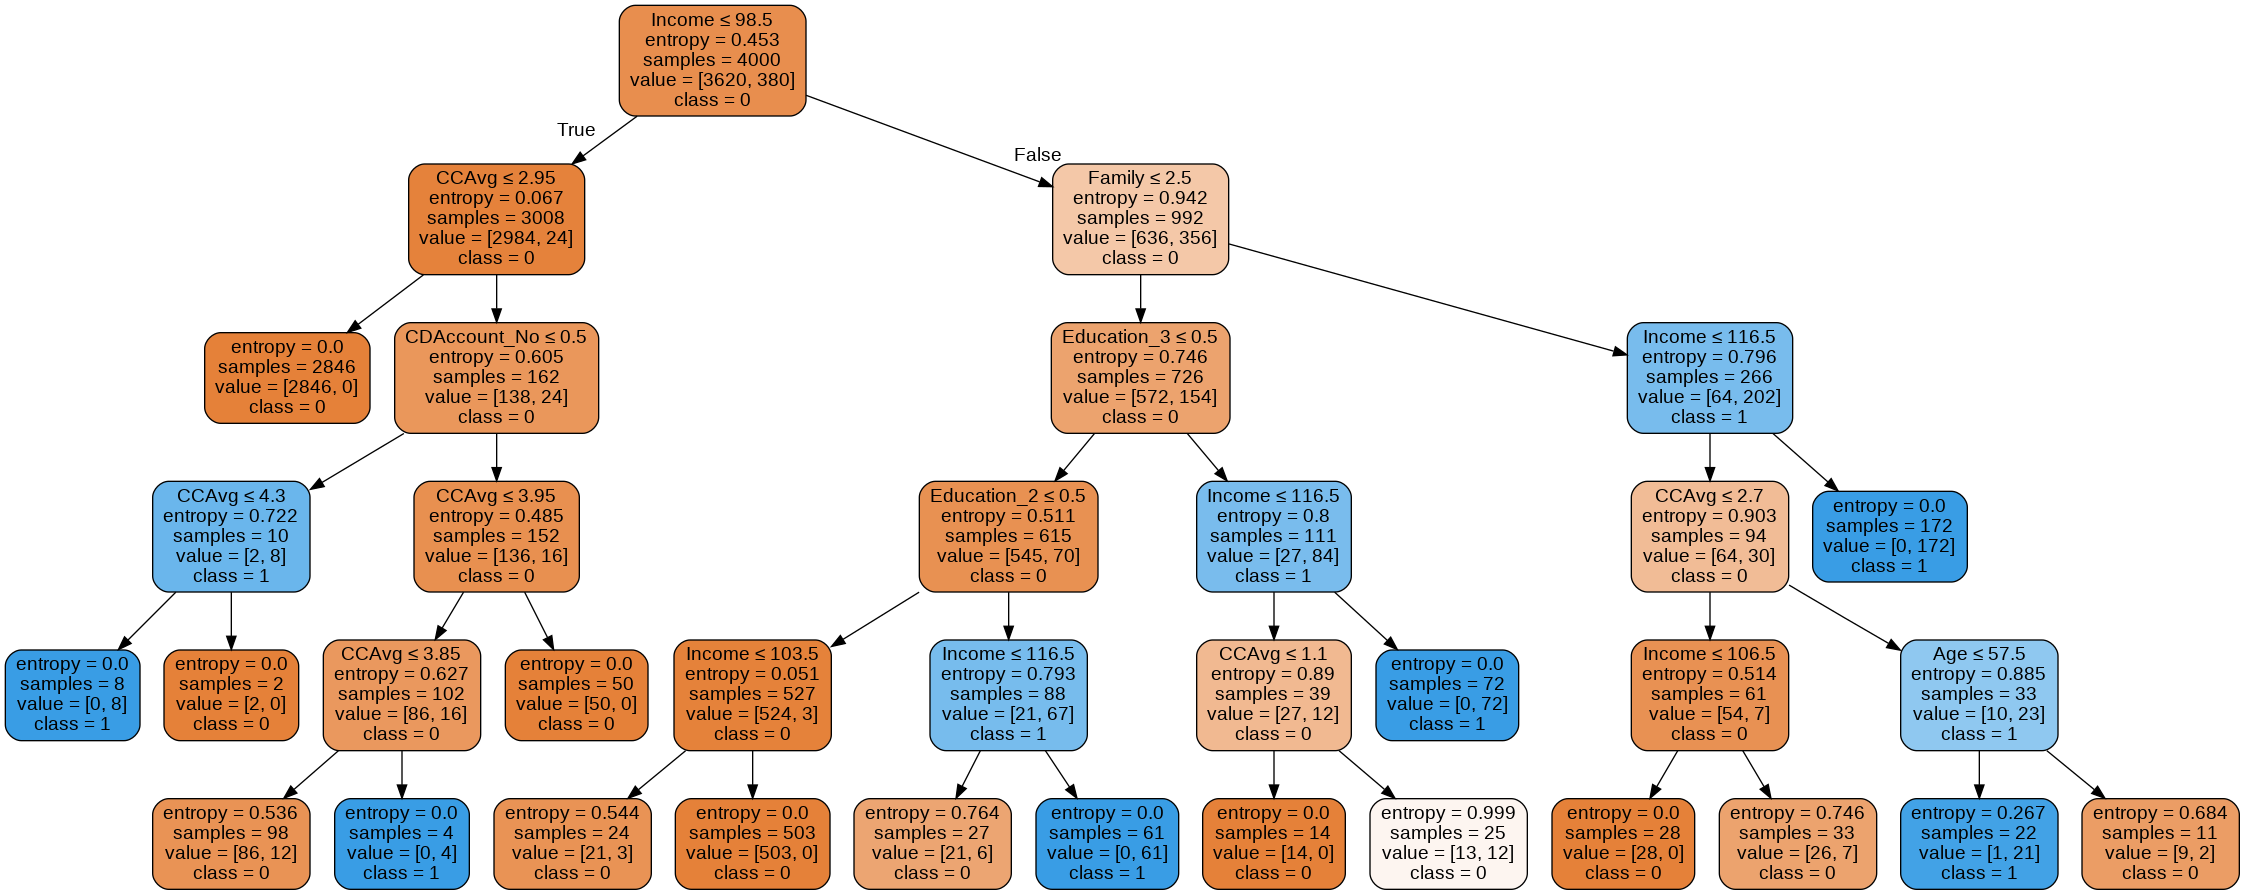

In [ ]:
# Run Classification tree with k-fold cross validation with k=5
# Placeholder variable: kfolds
kfolds = 5

# Here we specify within which range of depths we will search for the best pruned tree
maximum_depth = 100
minimum_depth = 1

param_grid = {'max_depth': list(range(minimum_depth, maximum_depth+1))}

# Create a user-defined function, profit_calcuation, that calcuates the profit over a dataset 
# for which we know the actual class (e.g., acceptance/rejection upon receiving a offer) from y_value
# and the predictors values (e.g., consumers age, experience, income) from x_value
# using the probability prediction model carried by the model object model.

def profit_calculation(model, x_value, y_value):
  
  # Specify the decision cut-off used in the decision rule
  d_cutoff = 1/11

  # Get the decisions made by the decision rule for each observation in the dataset
  # The method predict_proba is to get the predicted probability
  # Then we compare the predicted probabilities with the decision cut-off d_cutoff
  # True means SEND, False means NOT SEND
  # list() is to convert the results into a Python list
  decision = list(model.predict_proba(x_value)[:,1] > d_cutoff)
  
  # We put the actual class into a Python list called y
  y = list(y_value)
  
  # Get the number of observations of the dataset and put it into n_obs
  n_obs = len(y)

  # cum_profit is for cumulating the profit during the for-loop
  cum_profit = 0

  for i in range(n_obs): # i will go from 0 to (n_obs-1)
    if decision[i] == True and y[i] == 1: # if the decision is SEND and the actual class is 1 (Accept) for the i-th observation
      profit = 10 # the net profit is 10
    elif decision[i] == True and y[i] == 0: # if the decision is SEND and the actual class is 0 (Reject) for the i-th observation
      profit = -1 # the net profit is -1
    else:
      profit = 0 # For any other situation, the net profit is zero
    cum_profit = cum_profit + profit # cumulating the profit
  
  average_net_profit = cum_profit / n_obs # Derive the average net profit
  return average_net_profit # return the average net profit

# Set n_jobs to be -1 to run  on all CPU cores.
# The search criterion is to find the model that maximizes 
# whatever the scoring function - for this case roc_auc - returns.

from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=1), param_grid, scoring='roc_auc', cv=kfolds, n_jobs=-1)
gridsearch.fit(X,y)
clf_BPT = gridsearch.best_estimator_

# Display the resulting best pruned tree
Image(summary_tree(clf_BPT))




In [ ]:
# Display the level of depth of the best pruned tree
print(clf_BPT.get_depth())

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])


# Get the AUC of the best pruned tree model
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test_actual, clf_BPT.predict_proba(X_test)[:,1]))

5
0.9754222222222222


In [ ]:
import numpy as np

# The user-defined function for getting the tree path
# Author: Federico Ibba on stackoverflow.com 
# Created date: Jan 19, 2018
# URL: https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn/35911666
# Modified by Lin Hao during Oct. 2020

def get_treepaths(dtc, df):
    rules_list = []
    values_path = []
    values = dtc.tree_.value

    def RevTraverseTree(tree, node, rules, pathValues):
        try:
            prevnode = tree[2].index(node)           
            leftright = '<='
            pathValues.append(values[prevnode])
        except ValueError:
            # failed, so find it as a right node - if this also causes an exception, something's really f'd up
            prevnode = tree[3].index(node)
            leftright = '>'
            pathValues.append(values[prevnode])

        # now let's get the rule that caused prevnode to -> node
        p1 = df.columns[tree[0][prevnode]]    
        p2 = tree[1][prevnode]    
        rules.append(str(p1) + ' ' + leftright + ' ' + str(p2))

        # if we've not yet reached the top, go up the tree one more step
        if prevnode != 0:
            RevTraverseTree(tree, prevnode, rules, pathValues)

    # get the nodes which are leaves
    leaves = dtc.tree_.children_left == -1
    leaves = np.arange(0,dtc.tree_.node_count)[leaves]

    # build a simpler tree as a nested list: [split feature, split threshold, left node, right node]
    thistree = [dtc.tree_.feature.tolist()]
    thistree.append(dtc.tree_.threshold.tolist())
    thistree.append(dtc.tree_.children_left.tolist())
    thistree.append(dtc.tree_.children_right.tolist())

    # get the decision rules for each leaf node & apply them
    for (ind,nod) in enumerate(leaves):

        # get the decision rules
        rules = []
        pathValues = []
        RevTraverseTree(thistree, nod, rules, pathValues)

        pathValues.insert(0, values[nod])      
        pathValues = list(reversed(pathValues))

        rules = list(reversed(rules))

        rules_list.append(rules)
        values_path.append(pathValues)

    for i in range(len(rules_list)):
      
      print('\nLeaf node ID =', i+1)
      print('Path =', rules_list[i])
      distro = sum(values_path[i][-1])
      print('sample =', int(sum(distro)))
      print('value =', list([int(distro[0]), int(distro[1])]))
      predicted_class = 1 if distro[1] > distro[0] else 0
      print('class = ', predicted_class)
      
    return None

get_treepaths(dtc=clf_BPT, df=df_nontestData)


Leaf node ID = 1
Path = ['Income <= 98.5', 'CCAvg <= 2.950000047683716']
sample = 2846
value = [2846, 0]
class =  0

Leaf node ID = 2
Path = ['Income <= 98.5', 'CCAvg > 2.950000047683716', 'CDAccount_No <= 0.5', 'CCAvg <= 4.299999952316284']
sample = 8
value = [0, 8]
class =  1

Leaf node ID = 3
Path = ['Income <= 98.5', 'CCAvg > 2.950000047683716', 'CDAccount_No <= 0.5', 'CCAvg > 4.299999952316284']
sample = 2
value = [2, 0]
class =  0

Leaf node ID = 4
Path = ['Income <= 98.5', 'CCAvg > 2.950000047683716', 'CDAccount_No > 0.5', 'CCAvg <= 3.950000047683716', 'CCAvg <= 3.850000023841858']
sample = 98
value = [86, 12]
class =  0

Leaf node ID = 5
Path = ['Income <= 98.5', 'CCAvg > 2.950000047683716', 'CDAccount_No > 0.5', 'CCAvg <= 3.950000047683716', 'CCAvg > 3.850000023841858']
sample = 4
value = [0, 4]
class =  1

Leaf node ID = 6
Path = ['Income <= 98.5', 'CCAvg > 2.950000047683716', 'CDAccount_No > 0.5', 'CCAvg > 3.950000047683716']
sample = 50
value = [50, 0]
class =  0

Leaf nod